# Passenger satisfaction with the airline

## This dataset contains airline passenger surveys.

## Description of the columns of this dataset

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Import libraries

In [1]:
!pip install mlxtend

In [113]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bias_variance_decomp


%matplotlib inline

from functools import total_ordering

from sklearn.model_selection import KFold

# Reading data

In [196]:
pd.set_option('display.max_columns', None)

In [197]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [198]:
df_test = pd.read_csv('test.csv')

In [199]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


###  Concat df_test, and df_train

In [200]:
df = pd.concat([df_train,df_test]).reset_index(drop=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Exploratory Data Analysis

In [201]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

### Checking for the total number of values missing

In [203]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

## Replacing empty values with 0

In [204]:
df['Arrival Delay in Minutes'].fillna(0, inplace = True)

In [205]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Getting categorical values in column by using value_counts() function

In [206]:
df.Class.value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [207]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [208]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [209]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

## Check duplicated data

In [210]:
df.duplicated().any()

False

## Transform categorical data to numerical data

In [211]:
df['Gender1'] = df['Gender'].factorize(['male','female'])[0]
df['Customer Type1'] = df['Customer Type'].factorize(['Loyal Customer','disloyal Customer'])[0]
df['Type of Travel1'] = df['Type of Travel'].factorize(['Business travel','Personal Travel'])[0]
df['Class1'] = df['Class'].factorize(['Business','Eco ', 'Eco Plus'])[0]
df['satisfaction1'] = df['satisfaction'].factorize(['neutral or dissatisfied' 'satisfied'])[0]

In [212]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender1,Customer Type1,Type of Travel1,Class1,satisfaction1
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,2,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,1


# Visualization data

Text(0.5, 1.0, 'Number of dissatisfied or satisfied men and women')

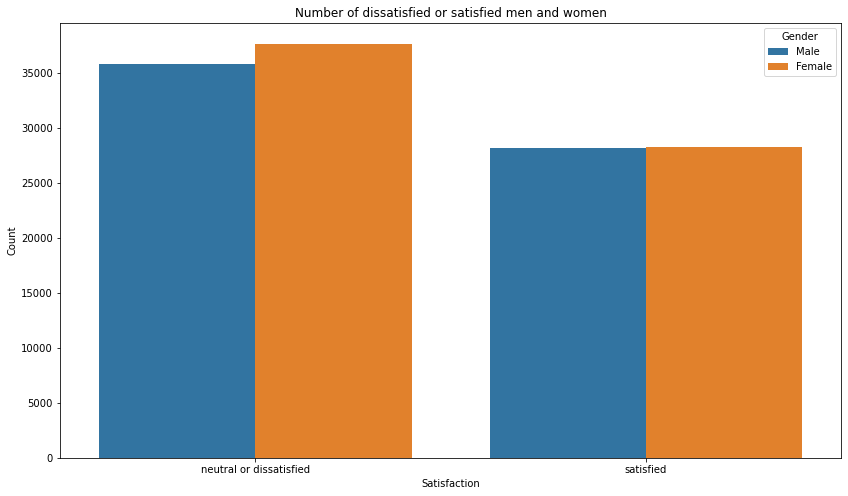

In [213]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', hue='Gender', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Number of dissatisfied or satisfied men and women')

Text(0.5, 1.0, 'Number of dissatisfied or satisfied customers')

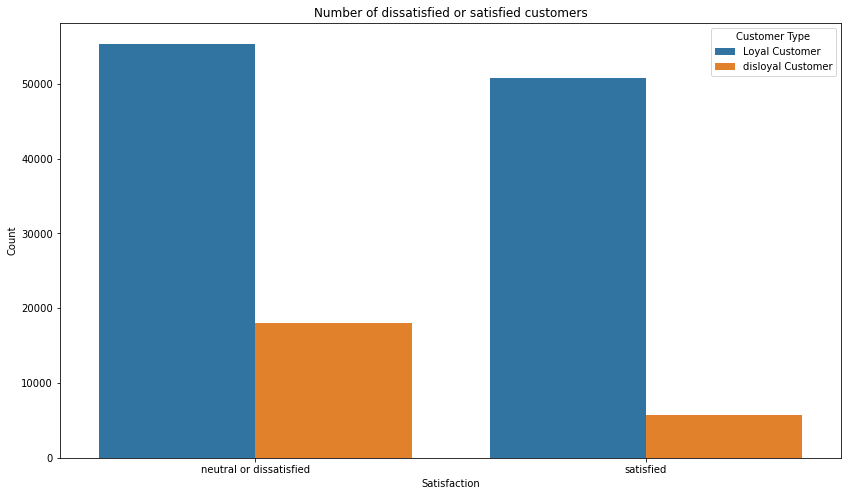

In [214]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', hue='Customer Type', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Number of dissatisfied or satisfied customers')

Text(0.5, 1.0, 'The number of dissatisfied or satisfied customers depending on the type of travel')

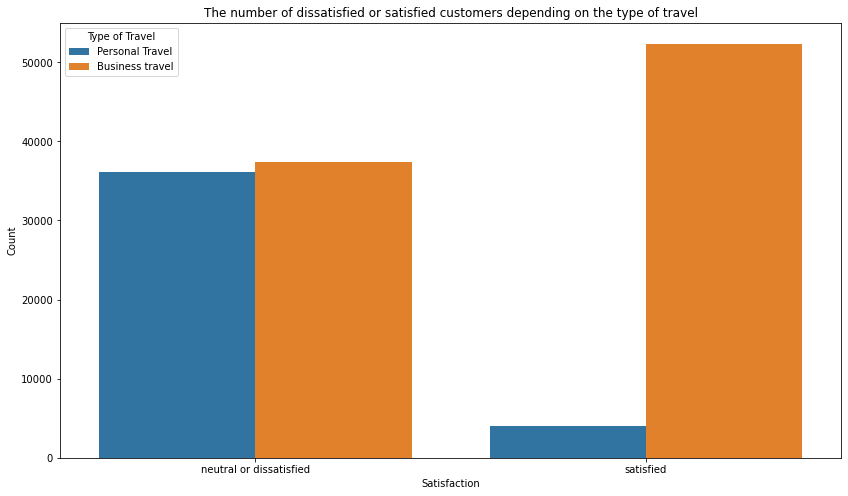

In [215]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', hue='Type of Travel', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('The number of dissatisfied or satisfied customers depending on the type of travel')

Text(0.5, 1.0, 'The number of dissatisfied or satisfied customers depending on the food and drink')

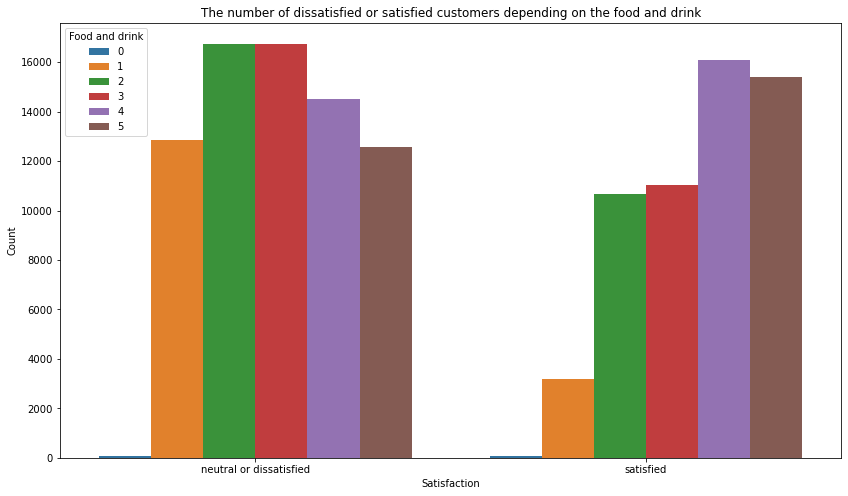

In [216]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', hue='Food and drink', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('The number of dissatisfied or satisfied customers depending on the food and drink')

Text(0.5, 1.0, 'The number of satisfied and dissatisfied customers depending on the class and age')

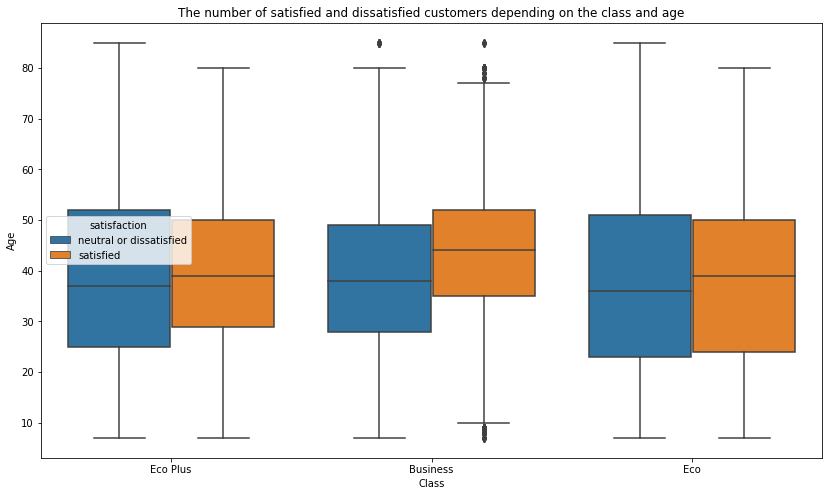

In [217]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x = 'Class', y = 'Age', hue='satisfaction')
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('The number of satisfied and dissatisfied customers depending on the class and age')

Text(0.5, 1.0, 'The number of satisfied and dissatisfied customers depending on seat comfort')

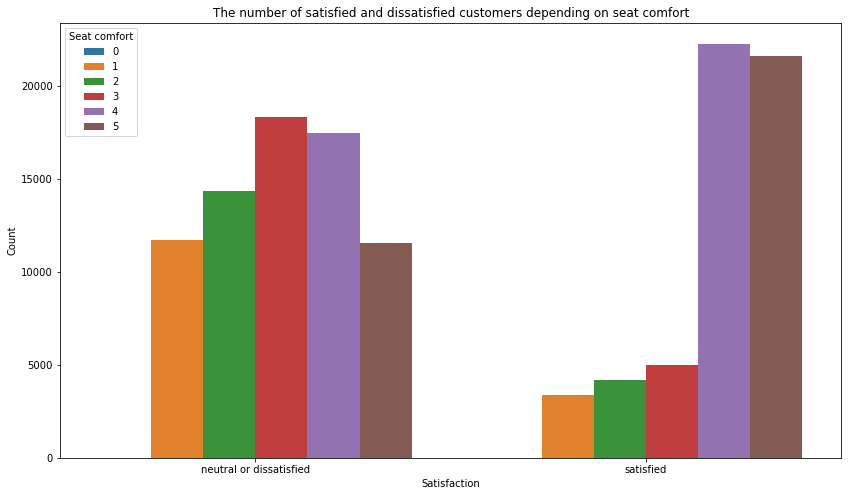

In [218]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', hue='Seat comfort', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('The number of satisfied and dissatisfied customers depending on seat comfort')

Text(0.5, 1.0, 'Total number of satisfied and dissatisfied customers')

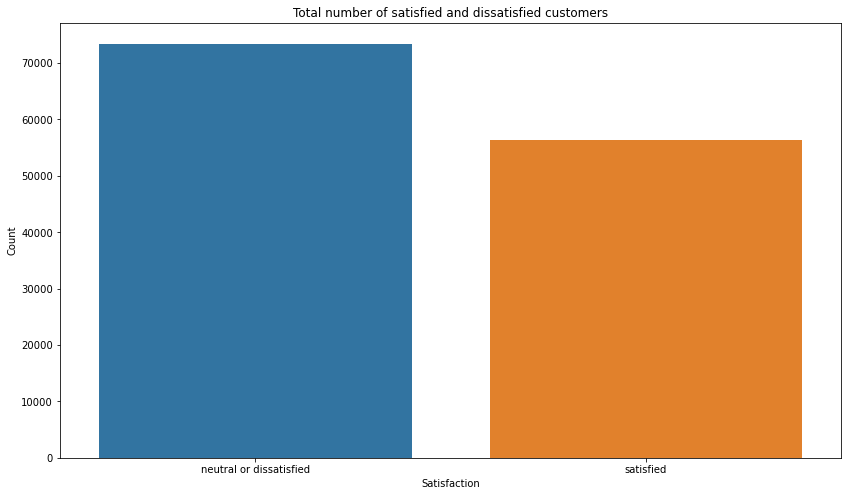

In [219]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'satisfaction', data = df)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Total number of satisfied and dissatisfied customers')

Text(0.5, 1.0, 'Arrival Delay in Minutes')

<Figure size 1008x576 with 0 Axes>

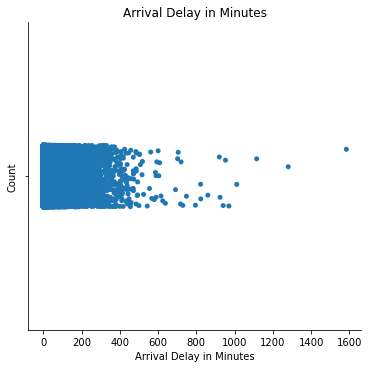

In [220]:
plt.figure(figsize=(14,8))
sns.catplot(data=df, x='Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Count')
plt.title('Arrival Delay in Minutes')

Text(0.5, 1.0, 'Departure Delay in Minutes')

<Figure size 1008x576 with 0 Axes>

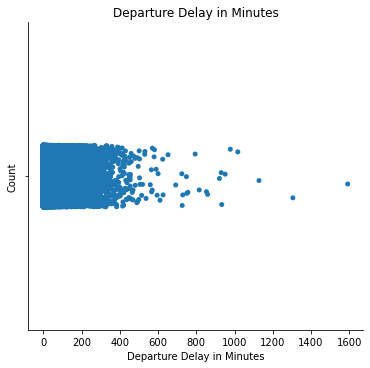

In [221]:
plt.figure(figsize=(14,8))
sns.catplot(data=df, x='Departure Delay in Minutes')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Count')
plt.title('Departure Delay in Minutes')

Text(0.5, 1.0, 'Dependence of Departure Delay on Arrival Delay')

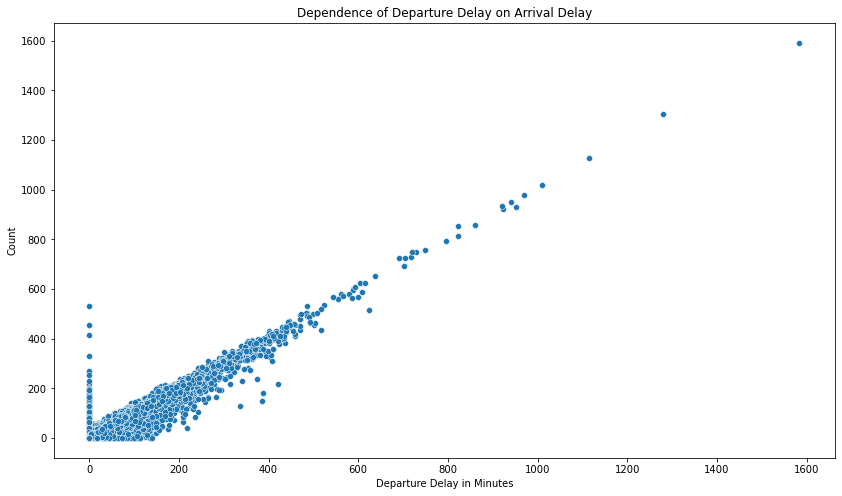

In [222]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x="Arrival Delay in Minutes", y="Departure Delay in Minutes")
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Count')
plt.title('Dependence of Departure Delay on Arrival Delay')

## Feature Selection

In [223]:
df1 = df.drop(['satisfaction', 'Gender', 'Type of Travel', 'Class', 'Customer Type', 'id', 'Unnamed: 0'], axis=1)
df1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender1,Customer Type1,Type of Travel1,Class1,satisfaction1
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,1


In [224]:
df1.corr().satisfaction1.to_frame().style.background_gradient()

,satisfaction1
Age,0.134091
Flight Distance,0.298085
Inflight wifi service,0.283460
Departure/Arrival time convenient,-0.054270
Ease of Online booking,0.168877
Gate location,-0.002793
Food and drink,0.211340
Online boarding,0.501749
Seat comfort,0.348829
Inflight entertainment,0.398234


I choose those characteristics with which the variable satisfaction1 is most correlated. These are such characteristics as: 'Flight Distance', 'Inflight wifi service', 'Food and drink' 'Online boarding', 'Seat comfort', 'Inflight entertainment', ' On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'

## Train test split

In [225]:
X = df1[['Flight Distance', 'Inflight wifi service', 'Food and drink',
         'Online boarding', 'Seat comfort', 'Inflight entertainment', 
         'On-board service', 'Leg room service', 'Baggage handling', 
         'Checkin service', 'Inflight service', 'Cleanliness']]
y = df1['satisfaction1']

In [226]:
X.head()

,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,460,3,5,3,5,5,4,3,4,4,5,5
1,235,3,1,3,1,1,1,5,3,1,4,1
2,1142,2,5,5,5,5,4,3,4,4,4,5
3,562,2,2,2,2,2,2,5,3,1,4,2
4,214,3,4,5,5,3,3,4,4,3,3,3


In [227]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction1, dtype: int64

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [229]:
X_test.shape

(38964, 12)

### Data standardization

In [230]:
scaller = StandardScaler()
X_train1 = scaller.fit_transform(X_train)
X_test1 = scaller.transform(X_test)

In [231]:
X_train1

array([[-0.93308123, -0.54783885, -0.15449423, ..., -0.24157179,
         0.30293849, -0.21872813],
       [-1.06919968,  0.95292398, -0.90662262, ..., -1.81941154,
         1.15239583, -0.21872813],
       [-0.86702375,  0.20254257, -0.90662262, ...,  1.33626797,
         1.15239583, -0.97915362],
       ...,
       [-0.38160134,  0.95292398,  0.59763416, ...,  0.54734809,
        -0.54651886,  1.30212285],
       [-1.00714568, -1.29822027, -1.65875101, ..., -0.24157179,
        -0.54651886, -0.21872813],
       [-0.23747593,  0.95292398, -0.90662262, ..., -0.24157179,
        -0.54651886,  0.54169736]])

In [232]:
X_train1 = pd.DataFrame(X_train1, columns=X_train.columns)
X_train1

,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-0.933081,-0.547839,-0.154494,-0.931187,0.421970,-0.271160,-1.854208,-1.027682,-0.535952,-0.241572,0.302938,-0.218728
1,-1.069200,0.952924,-0.906623,-0.190383,-1.854320,1.227763,1.254480,1.249980,1.159005,-1.819412,1.152396,-0.218728
2,-0.867024,0.202543,-0.906623,-0.190383,1.180733,-1.020622,0.477308,-1.027682,0.311527,1.336268,1.152396,-0.979154
3,1.309871,-1.298220,0.597634,0.550420,0.421970,0.478302,1.254480,-0.268461,0.311527,0.547348,0.302938,0.541697
4,-0.756928,-0.547839,-1.658751,-0.931187,-1.854320,-1.770083,-0.299864,-0.268461,1.159005,0.547348,0.302938,-1.739579
...,...,...,...,...,...,...,...,...,...,...,...,...
90911,-0.409626,1.703305,-1.658751,1.291224,1.180733,-1.770083,-0.299864,0.490759,0.311527,0.547348,1.152396,-1.739579
90912,-0.835997,1.703305,1.349763,1.291224,1.180733,1.227763,0.477308,0.490759,0.311527,-0.241572,0.302938,1.302123
90913,-0.381601,0.952924,0.597634,-0.931187,-1.095556,-0.271160,-0.299864,-0.268461,-0.535952,0.547348,-0.546519,1.302123
90914,-1.007146,-1.298220,-1.658751,0.550420,-0.336793,-0.271160,-0.299864,-0.268461,-2.230910,-0.241572,-0.546519,-0.218728


In [233]:
X_test1

array([[-0.10836358, -1.29822027, -1.65875101, ...,  1.33626797,
         1.15239583, -1.73957912],
       [-0.28251512, -0.54783885, -0.15449423, ..., -0.24157179,
         1.15239583, -0.21872813],
       [-0.34156651, -0.54783885,  0.59763416, ...,  1.33626797,
         0.30293849,  0.54169736],
       ...,
       [-0.7138905 , -2.04860168, -0.90662262, ...,  0.54734809,
        -0.54651886, -0.97915362],
       [-0.9651091 ,  0.20254257, -0.15449423, ...,  1.33626797,
         0.30293849, -0.21872813],
       [ 0.11583151, -0.54783885, -0.90662262, ...,  1.33626797,
         1.15239583, -0.97915362]])

In [234]:
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns)
X_test1

,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-0.108364,-1.298220,-1.658751,-1.671990,-1.854320,-1.770083,-0.299864,-1.027682,1.159005,1.336268,1.152396,-1.739579
1,-0.282515,-0.547839,-0.154494,-0.931187,1.180733,-0.271160,0.477308,1.249980,1.159005,-0.241572,1.152396,-0.218728
2,-0.341567,-0.547839,0.597634,0.550420,1.180733,0.478302,0.477308,0.490759,0.311527,1.336268,0.302938,0.541697
3,1.665180,-0.547839,1.349763,0.550420,1.180733,0.478302,0.477308,0.490759,0.311527,1.336268,0.302938,-0.218728
4,-0.824987,-0.547839,1.349763,1.291224,1.180733,1.227763,-0.299864,-1.027682,1.159005,-1.030492,0.302938,1.302123
...,...,...,...,...,...,...,...,...,...,...,...,...
38959,-0.781950,1.703305,1.349763,1.291224,1.180733,1.227763,1.254480,-0.268461,0.311527,-1.030492,0.302938,1.302123
38960,-0.348573,0.202543,-0.154494,-0.190383,-0.336793,-0.271160,-1.077036,1.249980,0.311527,-1.819412,-2.245434,-0.218728
38961,-0.713890,-2.048602,-0.906623,-2.412794,-1.095556,-1.020622,-1.854208,0.490759,0.311527,0.547348,-0.546519,-0.979154
38962,-0.965109,0.202543,-0.154494,-0.190383,-0.336793,-0.271160,-0.299864,-0.268461,-0.535952,1.336268,0.302938,-0.218728


## Choosing the best model

### Logistic regression

Using a grid search, I choose the optimal hyperparameters for this model

In [235]:
logModel = LogisticRegression()

In [236]:
param_grid_logistic = [{
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [50, 100, 150, 200]
}]

In [237]:
clf = GridSearchCV(logModel, param_grid=param_grid_logistic, cv = 5, verbose=True, n_jobs=-1)
clf.fit(X_train1, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


C:\Users\lipov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5200 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lipov\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lipov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lipov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [50, 100, 150, 200],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             verbose=True)

In [238]:
print(clf.best_params_, clf.best_score_)

{'C': 0.00026366508987303583, 'max_iter': 150, 'penalty': 'l1', 'solver': 'saga'} 0.8207905753064019


In [239]:
grid_prediction_lr = clf.predict(X_test1)

In [240]:
print(classification_report(y_test, grid_prediction_lr))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     22205
           1       0.81      0.75      0.78     16759

    accuracy                           0.82     38964
   macro avg       0.82      0.81      0.81     38964
weighted avg       0.82      0.82      0.82     38964



<AxesSubplot:>

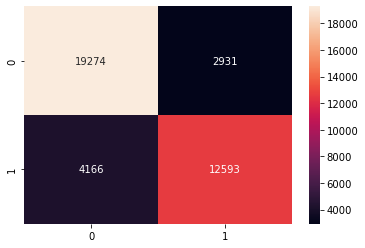

In [241]:
cm1=confusion_matrix(y_test, grid_prediction_lr)
sns.heatmap(cm1, annot=True, fmt='d')

### ROC Logistic regression

In [242]:
fpr, tpr, thresholds=roc_curve(y_test, grid_prediction_lr)

In [243]:
auc=roc_auc_score(y_test, grid_prediction_lr)
print('AUC: %.3f' % auc)

AUC: 0.810


In [244]:
help_prob=[0 for _ in range(len(y_test))]
help_fpr, help_tpr, _=roc_curve(y_test, help_prob)

# KNN Classifier

In [245]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 8),
             'metric' : ['euclidean', 'manhattan', 'minkowski']}
knn_gs = GridSearchCV(knn, params_knn, cv=5, n_jobs=-1)
knn_gs.fit(X_train1, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7])})

In [246]:
print(knn_gs.best_params_, knn_gs.best_score_)

{'metric': 'manhattan', 'n_neighbors': 7} 0.9097848209817968


In [247]:
grid_prediction_knn = knn_gs.predict(X_test1)

In [248]:
print(classification_report(y_test, grid_prediction_knn))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     22205
           1       0.92      0.87      0.90     16759

    accuracy                           0.91     38964
   macro avg       0.91      0.91      0.91     38964
weighted avg       0.91      0.91      0.91     38964



<AxesSubplot:>

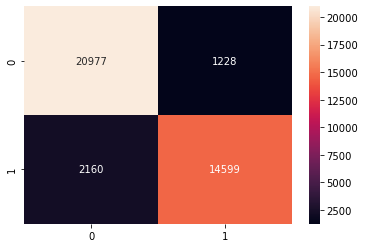

In [249]:
cmknn=confusion_matrix(y_test, grid_prediction_knn)
sns.heatmap(cmknn, annot=True, fmt='d')

### ROC KNN

In [250]:
fprk, tprk, thresholdsk=roc_curve(y_test, grid_prediction_knn)

In [251]:
aucknn=roc_auc_score(y_test, grid_prediction_knn)
print('AUC: %.3f' % aucknn)

AUC: 0.908


# Decision Tree

In [252]:
dt=DecisionTreeClassifier()
params_dt = {'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_depth': np.arange(1, 8)
             }
dt_gs = GridSearchCV(dt, params_dt, cv=5, n_jobs=-1)
dt_gs.fit(X_train1, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7])})

In [253]:
print(dt_gs.best_params_, dt_gs.best_score_)

{'criterion': 'gini', 'max_depth': 7} 0.8932861184304587


In [254]:
grid_prediction_dt = dt_gs.predict(X_test1)

In [255]:
print(classification_report(y_test, grid_prediction_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     22205
           1       0.87      0.89      0.88     16759

    accuracy                           0.89     38964
   macro avg       0.89      0.89      0.89     38964
weighted avg       0.89      0.89      0.89     38964



<AxesSubplot:>

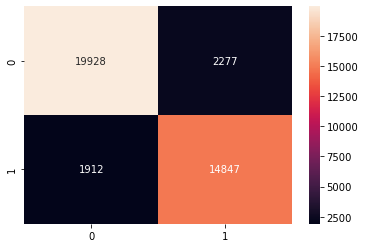

In [256]:
cmdt=confusion_matrix(y_test, grid_prediction_dt)
sns.heatmap(cmdt, annot=True, fmt='d')

### ROC Decision Tree

In [257]:
fprdt, tprdt, thresholdsdt=roc_curve(y_test, grid_prediction_dt)

In [258]:
aucdt=roc_auc_score(y_test, grid_prediction_dt)
print('AUC: %.3f' % aucdt)

AUC: 0.892


## Ensembling: Voting

In [259]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=7)
knn_best = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
log_reg = LogisticRegression(C = 0.00026366508987303583, max_iter = 50, penalty = 'l1', solver = 'saga')

In [260]:
estimators=[('knn', knn_best), ('dt', dt), ('log_reg', log_reg)]
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train1, y_train)
y_pred_ens=ensemble.predict(X_test1)
print(classification_report(y_test, y_pred_ens))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     22205
           1       0.89      0.87      0.88     16759

    accuracy                           0.90     38964
   macro avg       0.90      0.89      0.89     38964
weighted avg       0.90      0.90      0.90     38964



<AxesSubplot:>

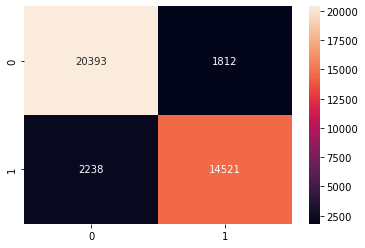

In [261]:
cm_ens=confusion_matrix(y_test, y_pred_ens)
sns.heatmap(cm_ens, annot=True, fmt='d')

### ROC  Voting

In [262]:
fpre, tpre, thresholdse=roc_curve(y_test, y_pred_ens)

In [263]:
auc_ens=roc_auc_score(y_test, y_pred_ens)
print('AUC: %.3f' % auc_ens)

AUC: 0.892


## Stacking

In [264]:
estimators_s=[('knn', knn_best), ('dt', dt), ('log_reg', log_reg)]
stacking_clf = StackingClassifier(
    estimators=estimators_s, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train1, y_train)

y_pred_st=stacking_clf.predict(X_test1)
print(classification_report(y_test, y_pred_st))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     22205
           1       0.91      0.90      0.91     16759

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



<AxesSubplot:>

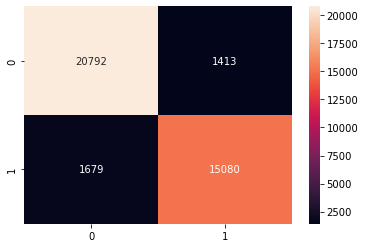

In [265]:
cm_st=confusion_matrix(y_test, y_pred_st)
sns.heatmap(cm_st, annot=True, fmt='d')

### ROC  Stacking

In [266]:
fpr_st, tpr_st, thresholds_st=roc_curve(y_test, y_pred_st)

In [267]:
auc_st=roc_auc_score(y_test, y_pred_st)
print('AUC: %.3f' % auc_st)

AUC: 0.918


## Bagging

In [268]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=7))
bg.fit(X_train1, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7))

In [269]:
y_bg=bg.predict(X_test1)

In [270]:
print(classification_report(y_test, y_bg))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     22205
           1       0.87      0.88      0.88     16759

    accuracy                           0.89     38964
   macro avg       0.89      0.89      0.89     38964
weighted avg       0.89      0.89      0.89     38964



<AxesSubplot:>

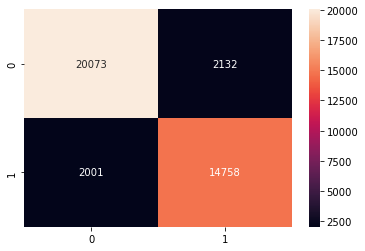

In [271]:
cmbg=confusion_matrix(y_test, y_bg)
sns.heatmap(cmbg, annot=True, fmt='d')

### ROC Bagging 

In [272]:
fpr_bg, tpr_bg, thresholds_bg=roc_curve(y_test, grid_prediction_boo)

In [273]:
auc_bg=roc_auc_score(y_test, grid_prediction_boo)
print('AUC: %.3f' % auc_bg)

AUC: 0.875


##  Random Forest

In [274]:
rf = RandomForestClassifier(random_state=123)
params_rf = {
    'n_estimators': [1, 5, 10, 50, 100, 200],
    'max_leaf_nodes':[4,8,16,32]
}
rf_gs = GridSearchCV(rf, params_rf, cv=5, n_jobs=-1)
rf_gs.fit(X_train1, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_, rf_gs.best_score_)

{'max_leaf_nodes': 32, 'n_estimators': 200} 0.8930660970411319


In [275]:
grid_prediction_rf = rf_gs.predict(X_test1)

In [276]:
print(classification_report(y_test, grid_prediction_rf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     22205
           1       0.88      0.87      0.87     16759

    accuracy                           0.89     38964
   macro avg       0.89      0.89      0.89     38964
weighted avg       0.89      0.89      0.89     38964



<AxesSubplot:>

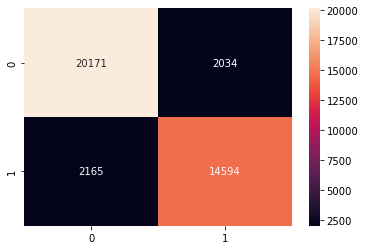

In [277]:
cm_rf=confusion_matrix(y_test, grid_prediction_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')

### ROC Random Forest

In [278]:
fpr_rf, tpr_rf, thresholds_rf=roc_curve(y_test, grid_prediction_rf)

In [279]:
auc_rf=roc_auc_score(y_test, grid_prediction_rf)
print('AUC: %.3f' % auc_rf)

AUC: 0.890


## Boosting

In [280]:
ada = AdaBoostClassifier(random_state=42)
params_ada = {
    'n_estimators': [1, 5, 10, 50, 100, 200],
    'learning_rate':np.logspace(-4, 4, 20)
}
ada_gs = GridSearchCV(ada, params_ada, cv=5, n_jobs=-1)
ada_gs.fit(X_train1, y_train)
print(ada_gs.best_params_, ada_gs.best_score_)

{'learning_rate': 1.623776739188721, 'n_estimators': 200} 0.8798671025780596


In [281]:
grid_prediction_boo = ada_gs.predict(X_test1)

In [282]:
print(classification_report(y_test, grid_prediction_boo))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     22205
           1       0.87      0.85      0.86     16759

    accuracy                           0.88     38964
   macro avg       0.88      0.87      0.88     38964
weighted avg       0.88      0.88      0.88     38964



<AxesSubplot:>

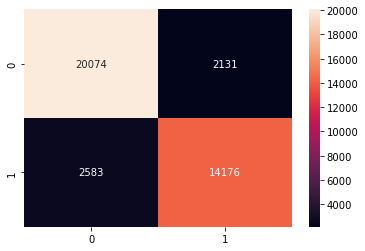

In [283]:
cmada=confusion_matrix(y_test, grid_prediction_boo)
sns.heatmap(cmada, annot=True, fmt='d')

### ROC AdaBoosting

In [288]:
fpr_ada, tpr_ada, thresholds_ada=roc_curve(y_test, grid_prediction_boo)

In [289]:
auc_ada=roc_auc_score(y_test, grid_prediction_boo)
print('AUC: %.3f' % auc_ada)

AUC: 0.875


## Graphs of ROC curves for these models

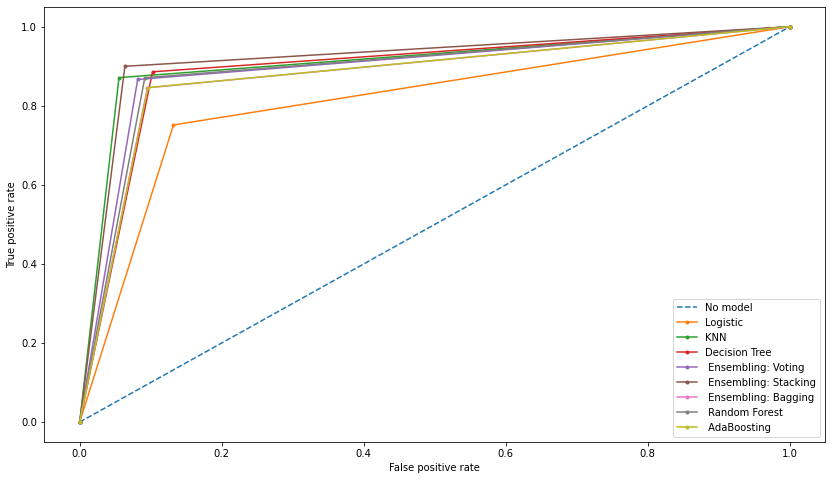

In [290]:
plt.figure(figsize=(14,8))
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fprk, tprk, marker = '.', label = 'KNN')
plt.plot(fprdt, tprdt, marker = '.', label = 'Decision Tree')
plt.plot(fpre, tpre, marker = '.', label = ' Ensembling: Voting')
plt.plot(fpr_st, tpr_st, marker = '.', label = ' Ensembling: Stacking')
plt.plot(fpr_bg, tpr_bg, marker = '.', label = ' Ensembling: Bagging')
plt.plot(fpr_rf, tpr_rf, marker = '.', label = ' Random Forest')
plt.plot(fpr_ada, tpr_ada, marker = '.', label = ' AdaBoosting')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Looking at the curve graphs, we can conclude that the best classification models for this dataset are 'Ensembling: Stacking' and 'KNN'.